In [1]:
#Import TensorFlow and other libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print (x_train.shape)
print (x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [7]:
latent_dim = 64
class Autoencoder(Model):
  def __init__(self, latent_dim):
     super(Autoencoder, self).__init__()
     self.latent_dim = latent_dim
     self.encoder = tf.keras.Sequential([
     layers.Flatten(),
     layers.Dense(latent_dim, activation='relu'),
     ])
     self.decoder = tf.keras.Sequential([
     layers.Dense(784, activation='sigmoid'),
     layers.Reshape((28, 28))
     ])
  def call(self, x):
     encoded = self.encoder(x)
     decoded = self.decoder(encoded)
     return decoded
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0399 - val_loss: 0.0135
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0126 - val_loss: 0.0112
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0090 - val_loss: 0.0091


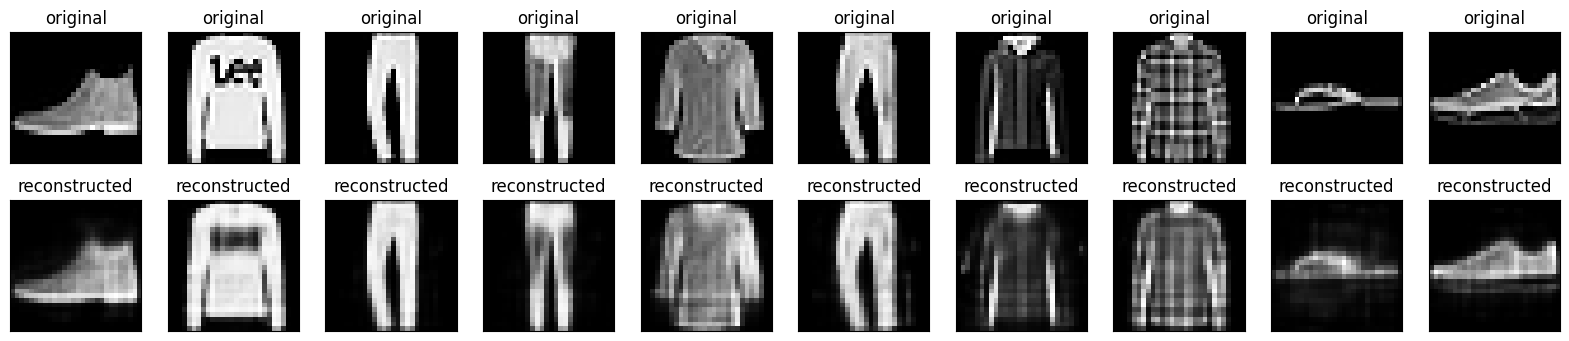

In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
   # display original
   ax = plt.subplot(2, n, i + 1)
   plt.imshow(x_test[i])
   plt.title("original")
   plt.gray()
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
   # display reconstruction
   ax = plt.subplot(2, n, i + 1 + n)
   plt.imshow(decoded_imgs[i])
   plt.title("reconstructed")
   plt.gray()
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
plt.show()